In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
import pickle
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
import matplotlib.pylab as plt

2023-08-26 22:06:53.078647: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-26 22:06:53.580691: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-26 22:06:53.736072: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-08-26 22:06:53.736110: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not ha

In [2]:
customer_df = pd.read_csv('customers.csv')

An automobile company has plans to enter new markets with their existing products. After intensive market research, they’ve decided that the behavior of the new market is similar to their existing market.

In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for a different segment of customers. This strategy has work exceptionally well for them. They plan to use the same strategy for the new markets.

You are required to help the manager to predict the right group of the new customers.

## Data Exploration

In [3]:
customer_df.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [4]:
customer_df.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [5]:
customer_df.shape

(10695, 11)

In [6]:
customer_df.isnull().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation          0
dtype: int64

In [7]:
customer_df_cleaned = customer_df.dropna(axis=0)

In [8]:
customer_df_cleaned.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [9]:
customer_df_cleaned.shape

(8819, 11)

In [10]:
customer_df_cleaned.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [11]:
customer_df_cleaned['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [12]:
customer_df_cleaned['Ever_Married'].unique()

array(['No', 'Yes'], dtype=object)

In [13]:
customer_df_cleaned['Graduated'].unique()

array(['No', 'Yes'], dtype=object)

In [14]:
customer_df_cleaned['Profession'].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Artist', 'Doctor',
       'Homemaker', 'Entertainment', 'Marketing', 'Executive'],
      dtype=object)

In [15]:
customer_df_cleaned['Spending_Score'].unique()

array(['Low', 'High', 'Average'], dtype=object)

In [16]:
customer_df_cleaned['Var_1'].unique()

array(['Cat_4', 'Cat_6', 'Cat_7', 'Cat_3', 'Cat_1', 'Cat_2', 'Cat_5'],
      dtype=object)

In [17]:
customer_df_cleaned['Segmentation'].unique()

array(['D', 'B', 'C', 'A'], dtype=object)

In [18]:
categories_list=[['Male', 'Female'],
           ['No', 'Yes'],
           ['No', 'Yes'],
           ['Healthcare', 'Engineer', 'Lawyer', 'Artist', 'Doctor',
            'Homemaker', 'Entertainment', 'Marketing', 'Executive'],
           ['Low', 'Average', 'High']
           ]
enc = OrdinalEncoder(categories=categories_list)

In [19]:
customers_1 = customer_df_cleaned.copy()

In [20]:
customers_1[['Gender',
             'Ever_Married',
              'Graduated','Profession',
              'Spending_Score']] = enc.fit_transform(customers_1[['Gender',
                                                                 'Ever_Married',
                                                                 'Graduated','Profession',
                                                                 'Spending_Score']])

In [21]:
customers_1.dtypes

ID                   int64
Gender             float64
Ever_Married       float64
Age                  int64
Graduated          float64
Profession         float64
Work_Experience    float64
Spending_Score     float64
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [22]:
le = LabelEncoder()

In [23]:
customers_1['Segmentation'] = le.fit_transform(customers_1['Segmentation'])

In [24]:
customers_1.dtypes

ID                   int64
Gender             float64
Ever_Married       float64
Age                  int64
Graduated          float64
Profession         float64
Work_Experience    float64
Spending_Score     float64
Family_Size        float64
Var_1               object
Segmentation         int64
dtype: object

In [25]:
customers_1 = customers_1.drop('ID',axis=1)
customers_1 = customers_1.drop('Var_1',axis=1)

In [26]:
customers_1.dtypes

Gender             float64
Ever_Married       float64
Age                  int64
Graduated          float64
Profession         float64
Work_Experience    float64
Spending_Score     float64
Family_Size        float64
Segmentation         int64
dtype: object

<AxesSubplot:>

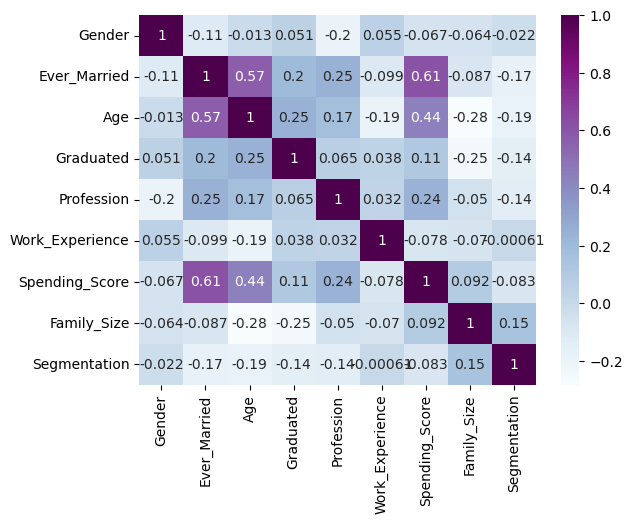

In [27]:
# Calculate the correlation matrix
corr = customers_1.corr()

# Plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="BuPu",
        annot= True)

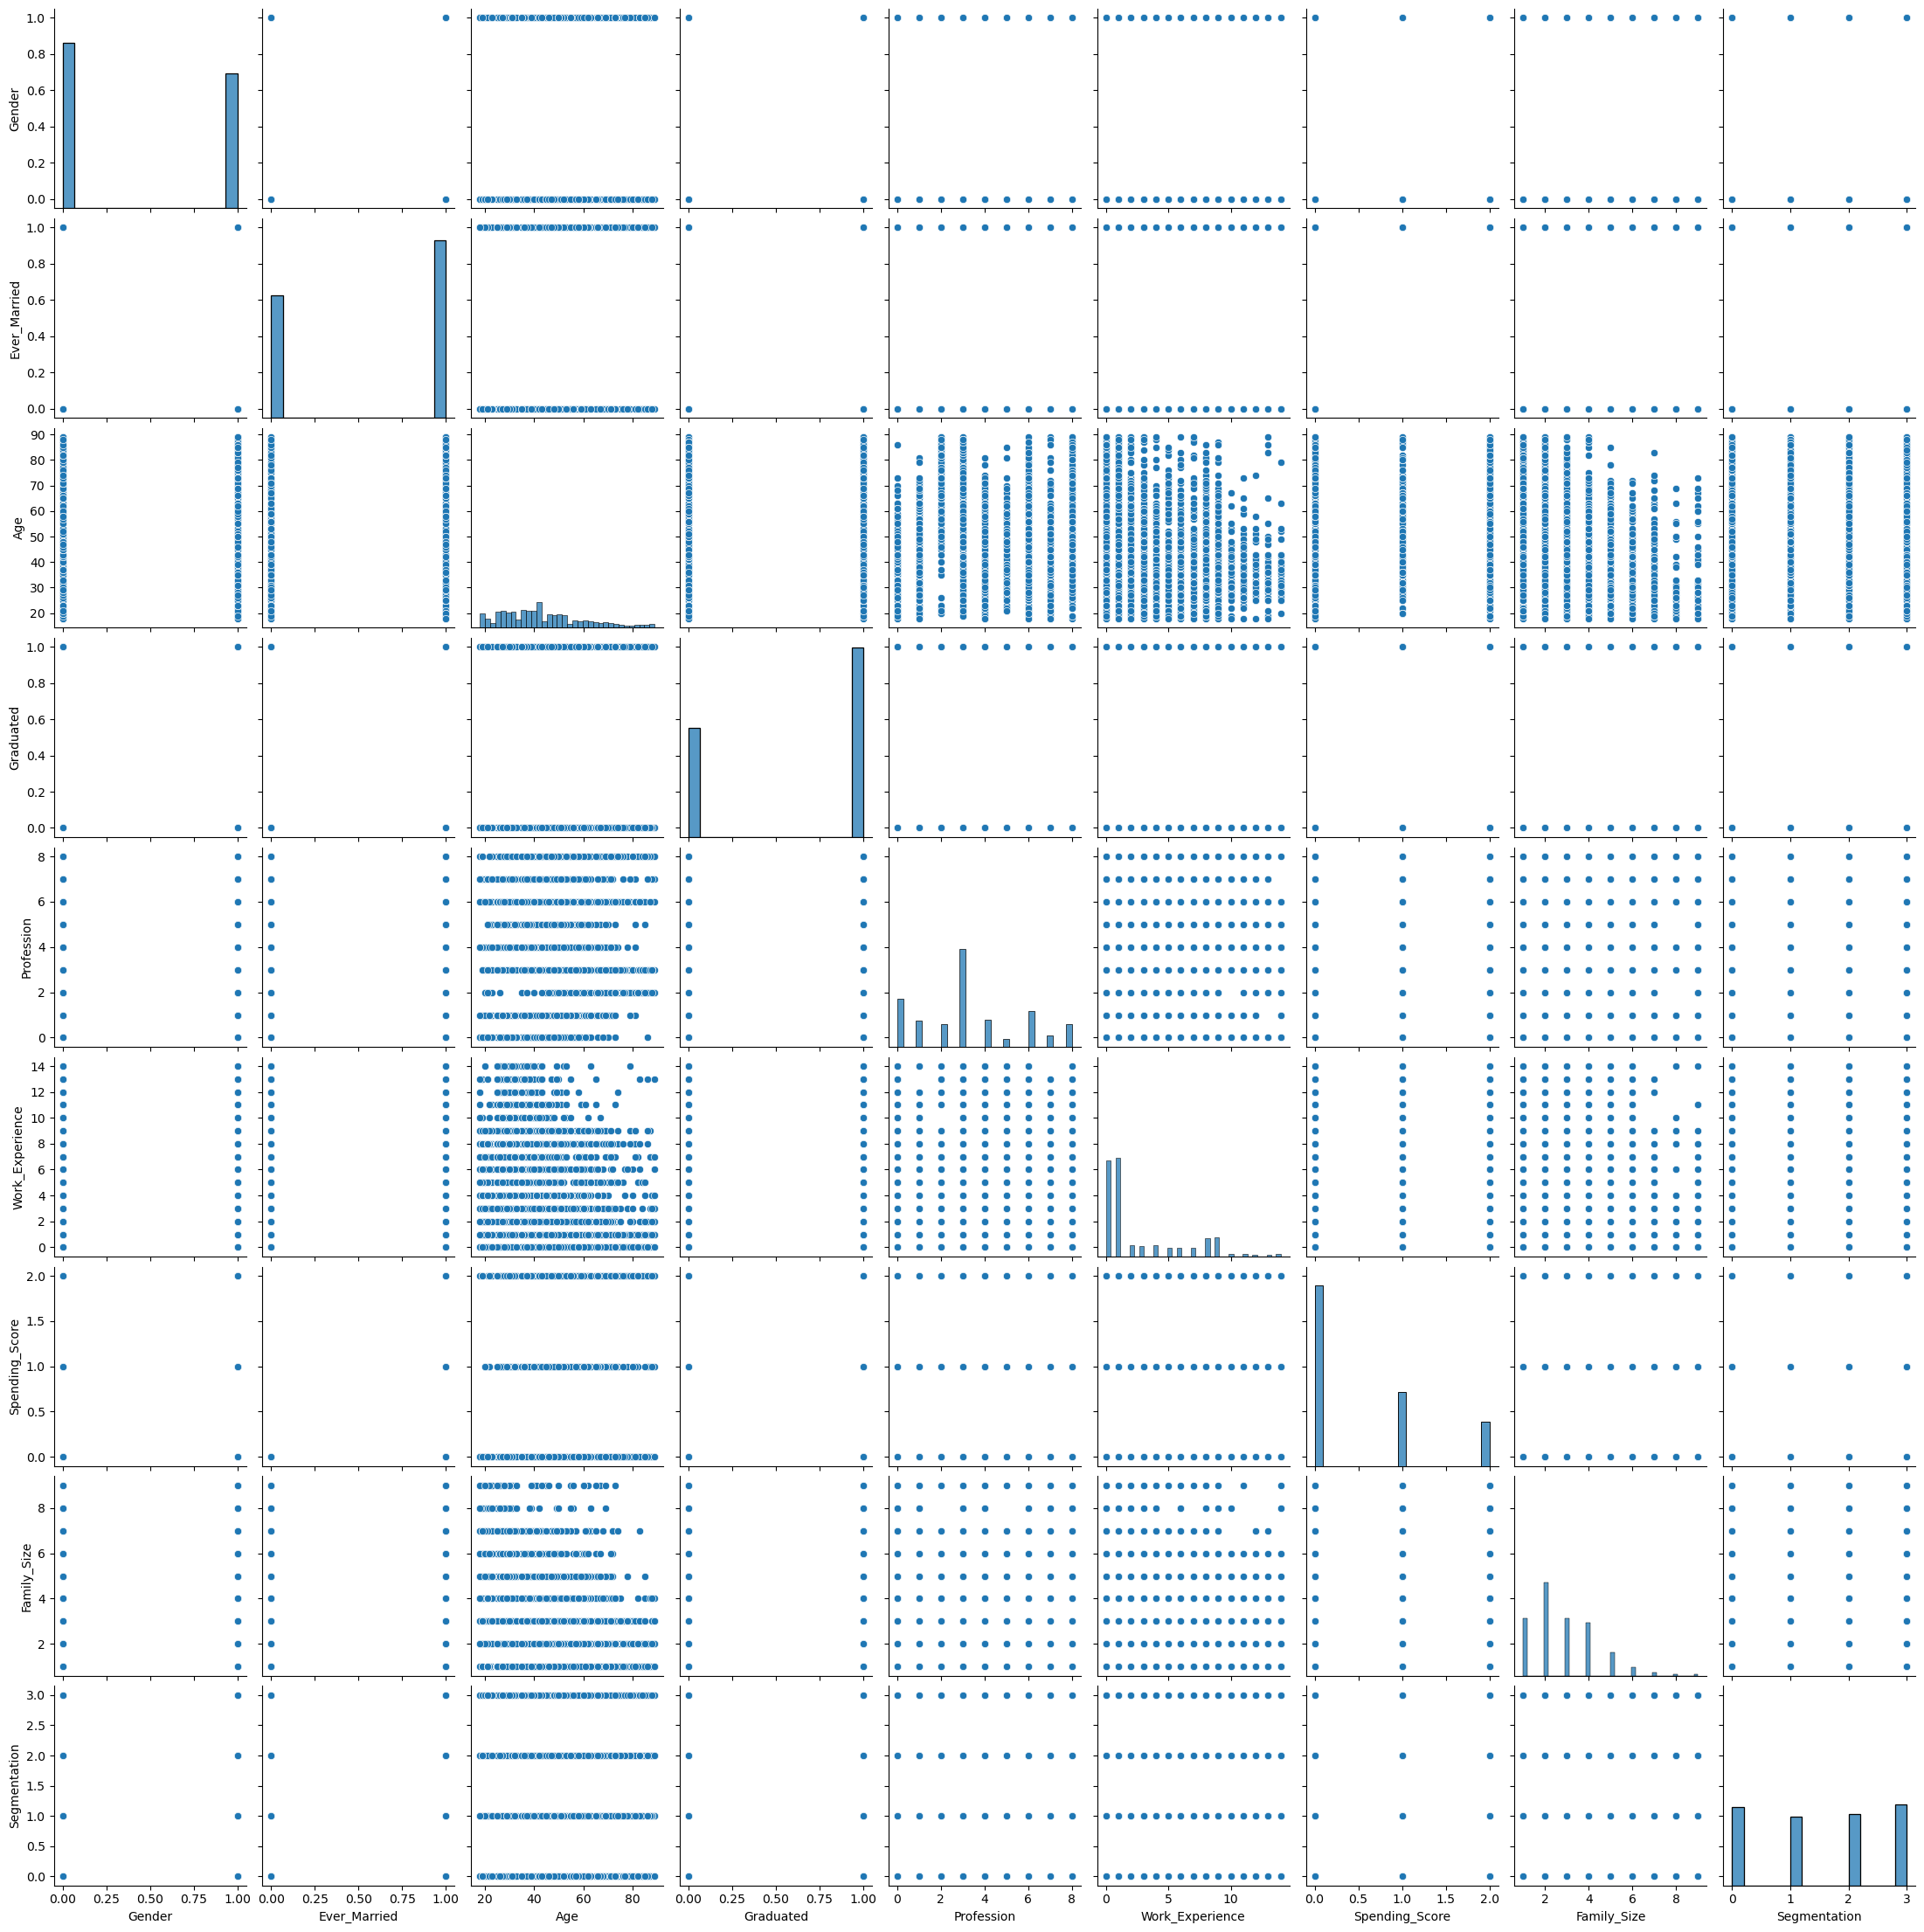

In [28]:
sns.pairplot(customers_1)

/home/sec/anaconda3/envs/ml/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

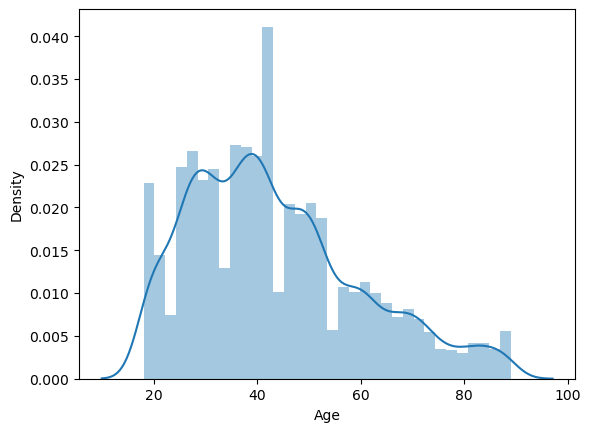

In [29]:
sns.distplot(customers_1['Age'])

/home/sec/anaconda3/envs/ml/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Family_Size', ylabel='count'>

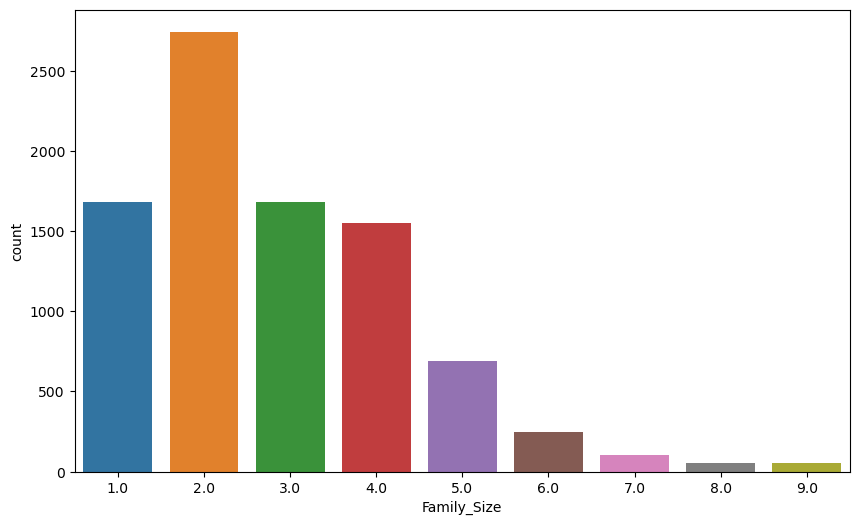

In [30]:
plt.figure(figsize=(10,6))
sns.countplot(customers_1['Family_Size'])

<AxesSubplot:xlabel='Family_Size', ylabel='Age'>

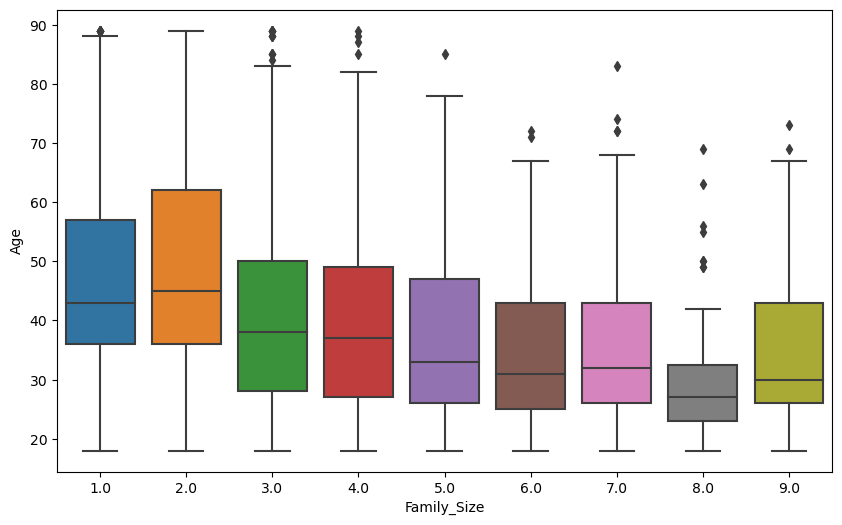

In [31]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Family_Size',y='Age',data=customers_1)

<AxesSubplot:xlabel='Family_Size', ylabel='Spending_Score'>

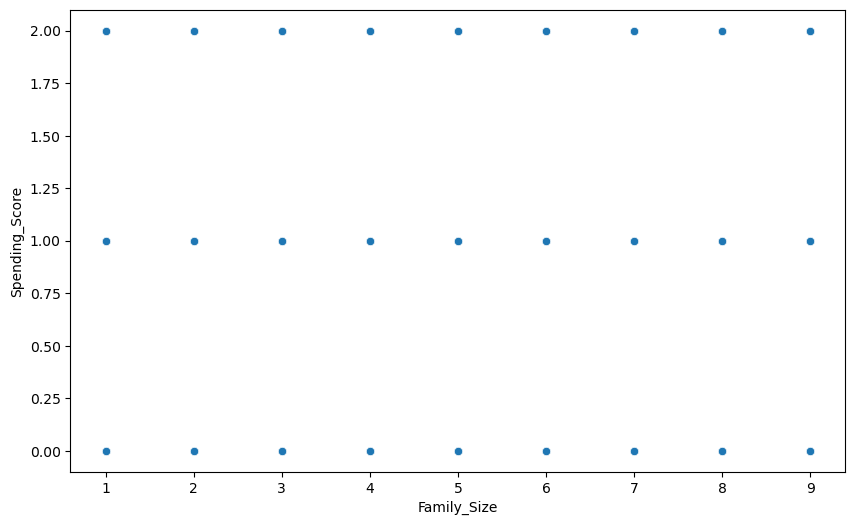

In [32]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Family_Size',y='Spending_Score',data=customers_1)

<AxesSubplot:xlabel='Family_Size', ylabel='Age'>

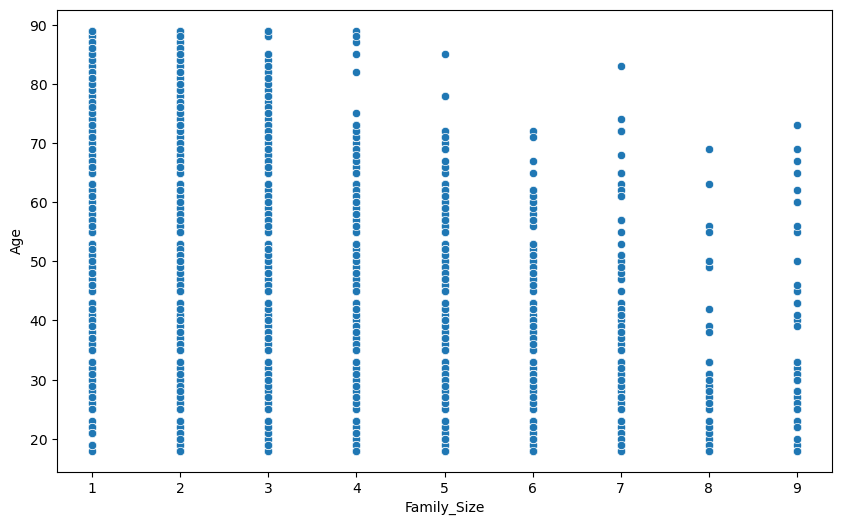

In [33]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Family_Size',y='Age',data=customers_1)

In [34]:
customers_1.describe()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
count,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000
mean,0.448804,0.591450,43.517859,0.634312,3.287561,2.610160,0.544846,2.840118,1.518086
std,0.497400,0.491594,16.581537,0.481650,2.346652,3.390676,0.738487,1.535051,1.146645
min,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,31.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000
50%,0.000000,1.000000,41.000000,1.000000,3.000000,1.000000,0.000000,2.000000,2.000000
75%,1.000000,1.000000,53.000000,1.000000,5.000000,4.000000,1.000000,4.000000,3.000000
max,1.000000,1.000000,89.000000,1.000000,8.000000,14.000000,2.000000,9.000000,3.000000


In [35]:
customers_1['Segmentation'].unique()

array([3, 1, 2, 0])

In [36]:
X=customers_1[['Gender','Ever_Married','Age','Graduated','Profession','Work_Experience','Spending_Score','Family_Size']].values

In [37]:
y1 = customers_1[['Segmentation']].values

In [38]:
one_hot_enc = OneHotEncoder()

In [39]:
one_hot_enc.fit(y1)

OneHotEncoder()

In [40]:
y1.shape

(8819, 1)

In [41]:
y = one_hot_enc.transform(y1).toarray()

In [42]:
y.shape

(8819, 4)

In [43]:
y1[0]

array([3])

In [44]:
y[0]

array([0., 0., 0., 1.])

In [45]:
X.shape

(8819, 8)

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=0.33,
                                               random_state=50)

In [47]:
X_train[0]

array([ 1.,  1., 85.,  0.,  2.,  0.,  0.,  1.])

In [48]:
X_train.shape

(5908, 8)

In [49]:
scaler_age = MinMaxScaler()

In [50]:
scaler_age.fit(X_train[:,2].reshape(-1,1))

MinMaxScaler()

In [51]:
X_train_scaled = np.copy(X_train)
X_test_scaled = np.copy(X_test)

In [52]:
# To scale the Age column
X_train_scaled[:,2] = scaler_age.transform(X_train[:,2].reshape(-1,1)).reshape(-1)
X_test_scaled[:,2] = scaler_age.transform(X_test[:,2].reshape(-1,1)).reshape(-1)

In [53]:
# Creating the model
ai_brain = Sequential([
  # Develop your model here
])

2023-08-26 22:07:10.356106: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-08-26 22:07:10.356433: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-08-26 22:07:10.356463: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (sec-HP-250-15-6-inch-G9-Notebook-PC): /proc/driver/nvidia/version does not exist
2023-08-26 22:07:10.356867: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [54]:
ai_brain.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [55]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [56]:
ai_brain.fit(x=X_train_scaled,y=y_train,
             epochs=2000,batch_size=256,
             validation_data=(X_test_scaled,y_test),
             )

Epoch 1/2000


ValueError: in user code:

    File "/home/sec/anaconda3/envs/ml/lib/python3.10/site-packages/keras/engine/training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "/home/sec/anaconda3/envs/ml/lib/python3.10/site-packages/keras/engine/training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/sec/anaconda3/envs/ml/lib/python3.10/site-packages/keras/engine/training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "/home/sec/anaconda3/envs/ml/lib/python3.10/site-packages/keras/engine/training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/sec/anaconda3/envs/ml/lib/python3.10/site-packages/keras/engine/training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "/home/sec/anaconda3/envs/ml/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/sec/anaconda3/envs/ml/lib/python3.10/site-packages/keras/losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "/home/sec/anaconda3/envs/ml/lib/python3.10/site-packages/keras/losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/sec/anaconda3/envs/ml/lib/python3.10/site-packages/keras/losses.py", line 1990, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/home/sec/anaconda3/envs/ml/lib/python3.10/site-packages/keras/backend.py", line 5529, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 4) and (None, 8) are incompatible


In [ ]:
metrics = pd.DataFrame(ai_brain.history.history)

In [ ]:
metrics.head()

In [ ]:
metrics[['loss','val_loss']].plot()

In [ ]:
# Sequential predict_classes function is deprecated
# predictions = ai_brain.predict_classes(X_test)
x_test_predictions = np.argmax(ai_brain.predict(X_test_scaled), axis=1)

In [ ]:
x_test_predictions.shape

In [ ]:
y_test_truevalue = np.argmax(y_test,axis=1)

In [ ]:
y_test_truevalue.shape

In [ ]:
print(confusion_matrix(y_test_truevalue,x_test_predictions))

In [ ]:
print(classification_report(y_test_truevalue,x_test_predictions))

In [ ]:
# Saving the Model
ai_brain.save('customer_classification_model.h5')

In [ ]:
# Saving the data
with open('customer_data.pickle', 'wb') as fh:
   pickle.dump([X_train_scaled,y_train,X_test_scaled,y_test,customers_1,customer_df_cleaned,scaler_age,enc,one_hot_enc,le], fh)

In [ ]:
# Loading the Model
ai_brain = load_model('customer_classification_model.h5')

In [ ]:
# Loading the data
with open('customer_data.pickle', 'rb') as fh:
   [X_train_scaled,y_train,X_test_scaled,y_test,customers_1,customer_df_cleaned,scaler_age,enc,one_hot_enc,le]=pickle.load(fh)

# Prediction for a single input

In [ ]:
x_single_prediction = np.argmax(ai_brain.predict(X_test_scaled[1:2,:]), axis=1)

In [ ]:
print(x_single_prediction)

In [ ]:
print(le.inverse_transform(x_single_prediction))